## Libraries

In [1]:
import pandas as pd
import random
import operator

## Data Frame extraction

In [2]:
df = pd.read_csv("G:/My Projects/If_it_fits_your_maccies/menu.csv")

In [3]:
df.shape

(260, 24)

In [4]:
df.shape[0]

260

In [5]:
menusize = df.shape[0]

In [6]:
menusize

260

In [7]:
df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [8]:
df_macro = df[["Item", "Total Fat", "Carbohydrates", "Protein"]]

In [9]:
item_list = df_macro["Item"].tolist()
fats = df_macro["Total Fat"].tolist()
carbs = df_macro["Carbohydrates"].tolist()
prot = df_macro["Protein"].tolist()

In [10]:
type(fats[1])

float

In [11]:
def fitness(gene, target):
    total_carbs = 0.0
    total_fats = 0.0
    total_protein = 0.0
    index = 0
    for i in gene:
        
        total_carbs += (i * carbs[i])
        total_fats += (i * fats[i])
        total_protein += (i * prot[i])
        index += 1
    score = ((target[0] - total_carbs)**2 +
            (target[1] - total_fats)**2 +
            (target[2] - total_protein)**2)
    return score

### Fitness

## initial pop

In [12]:
def generateChild(chromNumber):
    gene = []
    for i in range(chromNumber):
        chrom = random.randint(0,5)
        gene.append(chrom)
    return gene



In [13]:
def generatePop(popSize, chromSize):
    population = []
    i = 0
    while i < popSize:
        population.append(generateChild(chromSize))
        i+=1
    #population.pop(len(population))
    print(population)
    return population

In [14]:
generatePop(100, 10)

[[4, 0, 0, 5, 1, 1, 4, 0, 2, 2], [1, 0, 0, 4, 2, 4, 0, 3, 0, 3], [0, 5, 4, 0, 3, 2, 5, 3, 2, 0], [4, 2, 1, 0, 1, 2, 0, 3, 1, 4], [4, 3, 1, 2, 5, 2, 5, 0, 4, 3], [4, 0, 5, 4, 1, 5, 4, 5, 1, 0], [4, 3, 3, 0, 0, 2, 1, 4, 2, 1], [4, 4, 4, 1, 0, 2, 0, 4, 2, 2], [2, 4, 3, 3, 3, 1, 4, 1, 1, 2], [1, 4, 1, 3, 2, 5, 0, 1, 5, 2], [3, 0, 5, 0, 1, 1, 5, 5, 1, 3], [3, 3, 2, 3, 0, 0, 3, 4, 3, 5], [5, 5, 5, 4, 2, 0, 2, 2, 5, 3], [0, 4, 0, 4, 2, 3, 5, 5, 4, 5], [0, 0, 4, 4, 0, 1, 2, 1, 0, 5], [2, 0, 2, 0, 4, 3, 0, 2, 2, 3], [2, 5, 4, 4, 0, 0, 5, 5, 0, 4], [1, 2, 0, 4, 2, 0, 3, 4, 3, 1], [5, 5, 5, 5, 3, 2, 3, 5, 5, 4], [1, 0, 5, 2, 5, 0, 0, 3, 1, 3], [0, 5, 0, 5, 0, 3, 0, 0, 0, 4], [4, 3, 0, 2, 0, 0, 2, 4, 1, 2], [3, 3, 4, 0, 0, 2, 4, 4, 5, 5], [4, 4, 1, 5, 4, 0, 3, 1, 0, 1], [3, 3, 1, 3, 0, 3, 3, 1, 3, 3], [0, 1, 0, 1, 3, 4, 2, 3, 0, 4], [2, 3, 4, 3, 3, 0, 2, 5, 1, 3], [4, 1, 5, 4, 5, 4, 1, 2, 5, 3], [5, 1, 5, 2, 1, 3, 4, 2, 0, 2], [2, 0, 4, 1, 4, 1, 1, 0, 5, 0], [0, 4, 5, 2, 3, 3, 2, 2, 0, 1], [2, 0, 

[[4, 0, 0, 5, 1, 1, 4, 0, 2, 2],
 [1, 0, 0, 4, 2, 4, 0, 3, 0, 3],
 [0, 5, 4, 0, 3, 2, 5, 3, 2, 0],
 [4, 2, 1, 0, 1, 2, 0, 3, 1, 4],
 [4, 3, 1, 2, 5, 2, 5, 0, 4, 3],
 [4, 0, 5, 4, 1, 5, 4, 5, 1, 0],
 [4, 3, 3, 0, 0, 2, 1, 4, 2, 1],
 [4, 4, 4, 1, 0, 2, 0, 4, 2, 2],
 [2, 4, 3, 3, 3, 1, 4, 1, 1, 2],
 [1, 4, 1, 3, 2, 5, 0, 1, 5, 2],
 [3, 0, 5, 0, 1, 1, 5, 5, 1, 3],
 [3, 3, 2, 3, 0, 0, 3, 4, 3, 5],
 [5, 5, 5, 4, 2, 0, 2, 2, 5, 3],
 [0, 4, 0, 4, 2, 3, 5, 5, 4, 5],
 [0, 0, 4, 4, 0, 1, 2, 1, 0, 5],
 [2, 0, 2, 0, 4, 3, 0, 2, 2, 3],
 [2, 5, 4, 4, 0, 0, 5, 5, 0, 4],
 [1, 2, 0, 4, 2, 0, 3, 4, 3, 1],
 [5, 5, 5, 5, 3, 2, 3, 5, 5, 4],
 [1, 0, 5, 2, 5, 0, 0, 3, 1, 3],
 [0, 5, 0, 5, 0, 3, 0, 0, 0, 4],
 [4, 3, 0, 2, 0, 0, 2, 4, 1, 2],
 [3, 3, 4, 0, 0, 2, 4, 4, 5, 5],
 [4, 4, 1, 5, 4, 0, 3, 1, 0, 1],
 [3, 3, 1, 3, 0, 3, 3, 1, 3, 3],
 [0, 1, 0, 1, 3, 4, 2, 3, 0, 4],
 [2, 3, 4, 3, 3, 0, 2, 5, 1, 3],
 [4, 1, 5, 4, 5, 4, 1, 2, 5, 3],
 [5, 1, 5, 2, 1, 3, 4, 2, 0, 2],
 [2, 0, 4, 1, 4, 1, 1, 0, 5, 0],
 [0, 4, 5,

## Performance of Genes

In [15]:
def computePerfPopulation(population):
    populationPerf = {}
    for gene in population:
        gName = str(gene)
        populationPerf[gName] = fitness(gene, tarNut)
    return sorted(populationPerf.items(), key = operator.itemgetter(1), reverse = False)

## Selecting Genes

In [16]:
def selectFromPopulation(sPop, best_sample, lucky_few):
    nextGeneration = []    
    for i in range(best_sample):
        nextGeneration.append(sPop[i][0])
    for i in range(lucky_few):
        nextGeneration.append(random.choice(sPop)[0])
        random.shuffle(nextGeneration)
    return nextGeneration

In [17]:
def betterDestring(sortedpop):
    i = 0
    for i in range(len(sortedpop)):
        sortedpop[i] = sortedpop[i].replace("[", "")
        sortedpop[i] = sortedpop[i].replace("]", "")
        sortedpop[i] = sortedpop[i].split(",")
        sortedpop[i] = list(map(int, sortedpop[i]))
        i += 1

    return sortedpop

## asdasd

In [18]:
def createChild(parent1, parent2):
    child = []
    for i in range(len(parent1)):
        if(int(100*random.random()) < 50):
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return child

In [19]:
def createChildren(breeders, number_of_child):
    nextPopulation = []
    for i in range(int(len(breeders)/2)):
        for j in range(number_of_child):
            nextPopulation.append(createChild(breeders[i],breeders[len(breeders) -1 -i]))
    return nextPopulation

## mutation

In [20]:
def mutate(gene):
    index_mod = random.randint(0, len(menusize) - 1)
    gene[index_mod] = random.randint(0,5)
    return gene


In [21]:
def mutatePopulation(population, chance_of_mutation):
    for i  in range(len(population)):
        if random.random()*100 < chance_of_mutation:
            population[i] = mutate(population[i])
        return population

# Creating Multiple Generations

In [22]:
def nextGeneration(firstGeneration, best_sample, lucky_few, number_of_child, chance_of_mutation):
    populationSorted = computePerfPopulation(firstGeneration)
    nextBreeders = selectFromPopulation(populationSorted, best_sample, lucky_few)
    destringBreeders = betterDestring(nextBreeders)
    nextPopulation = createChildren(destringBreeders, number_of_child)
    nextGeneration = mutatePopulation(nextPopulation, chance_of_mutation)
    
    return nextGeneration

In [23]:
def multipleGeneration(number_of_generation, popSize, chromsize, best_sample, lucky_few, number_of_child, chance_of_mutation):
    historic = []
    historicBest = []
    initialpop = generatePop(popSize, chromsize)
    historic.append(initialpop)
    historicBest.append(getBestIndividualFromPopulation(initialpop))
    for i in range (number_of_generation):
        historic.append(nextGeneration(historic[i], best_sample, lucky_few, number_of_child, chance_of_mutation))
    return historic

In [24]:
tarNut = [300, 80, 160]

In [25]:
def getBestIndividualFromPopulation(population):
    return(computePerfPopulation(population)[0])

In [26]:
y = multipleGeneration(100, 1000, menusize, 200, 50, 8, 0.1)

[[0, 4, 4, 3, 1, 4, 0, 4, 1, 3, 3, 5, 2, 2, 2, 0, 4, 0, 2, 5, 4, 0, 1, 3, 3, 3, 1, 4, 1, 3, 3, 4, 5, 2, 4, 1, 4, 3, 1, 2, 4, 0, 2, 1, 2, 3, 0, 2, 4, 0, 3, 4, 4, 4, 3, 1, 5, 4, 1, 2, 3, 4, 5, 0, 5, 1, 1, 4, 3, 3, 2, 4, 1, 2, 2, 3, 5, 3, 0, 4, 1, 1, 4, 2, 5, 3, 1, 0, 2, 2, 4, 1, 1, 4, 0, 3, 5, 1, 0, 4, 0, 2, 0, 4, 3, 4, 5, 1, 0, 2, 2, 5, 3, 5, 4, 5, 2, 0, 1, 1, 3, 3, 5, 5, 5, 4, 2, 5, 0, 3, 2, 4, 0, 0, 4, 3, 0, 2, 5, 4, 1, 4, 5, 1, 4, 5, 0, 0, 5, 1, 4, 2, 5, 2, 2, 4, 5, 1, 4, 1, 0, 4, 4, 4, 4, 3, 5, 0, 1, 0, 1, 1, 1, 3, 1, 2, 3, 5, 2, 5, 4, 5, 4, 2, 1, 3, 1, 4, 1, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 0, 2, 2, 2, 5, 0, 1, 5, 4, 5, 0, 3, 2, 0, 4, 2, 2, 4, 1, 2, 5, 3, 0, 1, 0, 1, 1, 0, 3, 2, 4, 4, 0, 3, 5, 3, 2, 1, 2, 0, 3, 3, 4, 0, 2, 4, 4, 5, 0, 4, 4, 5, 0, 1, 4, 4, 3, 5, 5, 3, 0], [3, 3, 0, 4, 2, 1, 5, 0, 3, 5, 2, 3, 3, 1, 4, 2, 1, 5, 2, 4, 1, 0, 5, 3, 1, 1, 4, 1, 3, 2, 5, 4, 1, 3, 0, 5, 5, 2, 3, 4, 0, 0, 4, 4, 4, 4, 4, 5, 1, 3, 3, 1, 0, 3, 0, 1, 0, 0, 1, 3, 5, 5, 1, 3, 3, 0, 2, 2, 5, 5, 5, 5, 

### Analysis

In [27]:
def storeBestHistoric(historic):
    historicBest = []
    historicBestScore = []
    for population in historic:
        historicBest.append(getBestIndividualFromPopulation(population))
    for i in historicBest:
        historicBestScore.append(i[1])
    return historicBest, historicBestScore


In [28]:
historicBest, historicBestScore = storeBestHistoric(y)

### Plotting

In [29]:
import matplotlib.pyplot as plt


def PlotCost(history):
    fig, ax = plt.subplots(1)
    
    
    ax.plot(history)
    #plt.plot(history)
    plt.show()
    




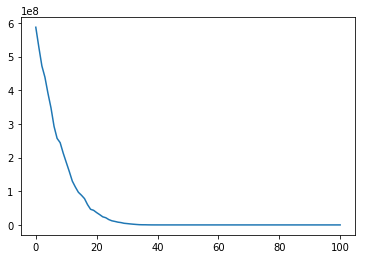

In [30]:
PlotCost(historicBestScore)

In [31]:
historicBest

[('[2, 4, 3, 0, 1, 0, 0, 5, 2, 2, 3, 4, 3, 5, 0, 1, 2, 0, 5, 3, 3, 0, 3, 4, 4, 0, 2, 2, 1, 3, 2, 3, 3, 1, 2, 2, 1, 5, 4, 0, 5, 1, 0, 1, 4, 1, 0, 1, 3, 3, 4, 1, 1, 4, 0, 5, 2, 0, 2, 0, 2, 3, 5, 4, 0, 4, 0, 2, 3, 4, 4, 0, 3, 0, 1, 3, 2, 1, 4, 5, 3, 2, 2, 3, 5, 0, 3, 1, 5, 4, 3, 1, 2, 1, 1, 4, 1, 2, 5, 4, 5, 2, 1, 1, 5, 4, 4, 5, 5, 5, 3, 3, 0, 0, 5, 0, 2, 1, 4, 5, 1, 1, 5, 5, 0, 1, 0, 2, 4, 3, 2, 5, 0, 1, 1, 1, 2, 5, 0, 3, 4, 1, 0, 3, 0, 2, 1, 0, 5, 2, 4, 2, 1, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 3, 2, 0, 0, 3, 4, 3, 2, 0, 5, 1, 4, 5, 3, 1, 1, 1, 0, 2, 2, 2, 2, 1, 5, 0, 1, 0, 0, 2, 1, 2, 3, 1, 3, 2, 4, 0, 5, 1, 5, 0, 4, 4, 1, 2, 5, 1, 2, 4, 2, 0, 1, 1, 1, 0, 1, 4, 3, 2, 0, 1, 5, 2, 5, 3, 0, 2, 5, 0, 1, 3, 1, 2, 0, 4, 1, 4, 1, 0, 0, 2, 2, 3, 0, 5, 3, 1, 2, 5, 5, 5, 5, 1, 2, 0, 3, 1]',
  587414819.0),
 ('[4, 4, 1, 3, 4, 5, 1, 1, 1, 1, 3, 2, 3, 1, 5, 1, 0, 4, 3, 1, 1, 3, 3, 0, 2, 2, 1, 0, 0, 4, 0, 3, 5, 1, 5, 5, 0, 2, 3, 3, 2, 1, 3, 2, 1, 2, 0, 0, 2, 0, 0, 5, 0, 0, 4, 0, 0, 3, 5, 1, 0, 3, 2, 4, 1,

In [32]:
historicBestScore

[587414819.0,
 528248612.0,
 472458131.0,
 438989242.0,
 390963348.0,
 347502185.0,
 292709772.0,
 257167085.0,
 244496507.0,
 213566804.0,
 186092340.0,
 158914619.0,
 130218156.0,
 112571198.0,
 96929112.0,
 88205549.0,
 78230814.0,
 60343307.0,
 46438010.0,
 43349364.0,
 36556451.0,
 30550892.0,
 24073778.0,
 21336185.0,
 15814476.0,
 12233912.0,
 10334072.0,
 8189720.0,
 6925844.0,
 4867792.0,
 3965065.0,
 2983313.0,
 2115728.0,
 1357016.0,
 704856.0,
 450064.0,
 386744.0,
 165608.0,
 68552.0,
 36200.0,
 2408.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0

In [33]:
lol = historicBestScore.index(min(historicBestScore))

In [34]:
print(lol)

41


In [35]:
bestScore = historicBest[lol][0]

In [36]:
bestScore

'[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'

In [37]:
def betterDestring(sortedpop):
    i = 0
    for i in range(len(sortedpop)):
        sortedpop[i] = sortedpop[i].replace("[", "")
        sortedpop[i] = sortedpop[i].replace("]", "")
        sortedpop[i] = sortedpop[i].split(",")
        sortedpop[i] = list(map(int, sortedpop[i]))
        i += 1

    return sortedpop

In [38]:
def Destring(string):
    string = string.replace("[", "")
    string = string.replace("]", "")
    string = string.split(",")
    string = list(map(int, string))

    return string

In [39]:
lolol = Destring(bestScore)

In [40]:
print(lolol)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [41]:
bestsolution = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
df_menu = df["Item"]

In [43]:
df["Solution"] = lolol

In [44]:
solution_df = df[df.Solution>=1]

In [45]:
solution_df.head(10)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Solution
18,Breakfast,Steak & Egg Biscuit (Regular Biscuit),7.1 oz (201 g),540,290,32.0,49,16.0,78,1.0,...,13,2,8,3,25,10,2,20,25,1
30,Breakfast,Big Breakfast with Egg Whites (Large Biscuit),10.1 oz (286 g),690,370,41.0,63,14.0,72,0.0,...,18,4,17,4,26,4,2,10,15,1
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050,450,50.0,77,16.0,81,0.0,...,38,7,28,18,35,4,2,25,30,1
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,39,6,24,1,87,0,15,8,25,1
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
151,Coffee & Tea,Caramel Latte (Small),12 fl oz cup,270,80,9.0,13,5.0,24,0.0,...,13,1,3,38,9,8,0,30,0,1
175,Coffee & Tea,Nonfat Latte with Sugar Free French Vanilla Sy...,12 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,8,1,4,13,10,10,0,30,0,1
203,Coffee & Tea,Hazelnut Iced Coffee (Medium),22 fl oz cup,180,60,7.0,11,4.5,22,0.0,...,10,0,0,28,1,4,0,4,0,1
225,Coffee & Tea,Frappé Mocha (Large),22 fl oz cup,670,240,26.0,41,17.0,85,1.0,...,33,1,4,88,11,20,0,35,4,1
226,Coffee & Tea,Frappé Caramel (Small),12 fl oz cup,450,170,19.0,29,12.0,60,1.0,...,21,0,0,57,7,15,0,25,2,1


In [46]:
sol_list = solution_df["Solution"].tolist()

In [47]:
item_list = solution_df["Item"].tolist()

In [48]:
print(str(sol_list[1]) + " " + str(item_list[1]))

1 Big Breakfast with Egg Whites (Large Biscuit)


In [49]:
def printmenu(solution, items):
    for i in range (len(solution)):
        print(str(solution[i]) + " " + (items[i]))

In [50]:
printmenu(sol_list, item_list)

1 Steak & Egg Biscuit (Regular Biscuit)
1 Big Breakfast with Egg Whites (Large Biscuit)
1 Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)
1 Chicken McNuggets (40 piece)
1 Diet Coke (Small)
1 Caramel Latte (Small)
1 Nonfat Latte with Sugar Free French Vanilla Syrup (Small)
1 Hazelnut Iced Coffee (Medium)
1 Frappé Mocha (Large)
1 Frappé Caramel (Small)


In [51]:
carbs_gained = solution_df["Carbohydrates"]
protein_gained = solution_df["Protein"]
fat_gained = solution_df["Total Fat"]

In [52]:
carbs_gained = carbs_gained * sol_list
protein_gained = protein_gained * sol_list
fat_gained = fat_gained * sol_list

In [53]:
total_carbs = sum(carbs_gained)

In [54]:
print(total_carbs)

581


In [55]:
total_fats = sum(fat_gained)

In [56]:
total_prot = sum(protein_gained)

In [57]:
def macro_info(carbs, fats, prot, target):
    carb_diff = carbs - target[0]
    fats_diff = fats - target[1]
    prot_diff = prot - target[2]
    if carb_diff >= 0:
        print("Carbohydrates are " + str(carb_diff) + " above target" )
    elif carb_diff <= 0:
        carb_diff = carb_diff * -1
        print ("Carbohydrates are " + str(carb_diff) + " below target" )
    else:
        print("Carbohydrates are on target")
    
    if fats_diff >= 0:
        print("Fats are " + str(fats_diff) + " above target" )
    elif fats_diff <= 0:
        fats_diff = fats_diff * -1
        print ("Fats  are " + str(fats_diff) + " below target" )
    else:
        print("Fats are on target")
    
    if prot_diff >= 0:
        print("Proteins are " + str(prot_diff) + " above target" )
    elif prot_diff <= 0:
        prot_diff = prot_diff * -1
        print ("Proteins are " + str(prot_diff) + " below target" )
    else:
        print("Proteins are on target")
    
        

In [58]:
macro_info(total_carbs, total_fats, total_prot, [300,100, 200])

Carbohydrates are 281 above target
Fats are 202.0 above target
Proteins are 11 above target
